# Importing and Reading Files

In [369]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [1149]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [1150]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

# Preliminary Exploration and Data Cleaning

In [1151]:
df[df.duplicated(keep=False)].sort_values(by='address').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [1152]:
# source : https://www.zillow.com/browse/homes/wa/king-county/
KCoZips =  [98052, 98092, 98115, 98103, 98003, 98023, 98105, 98042, 98034, 98133, 98118, 98125, 98058, 
            98031, 98122, 98033, 98032, 98004, 98059, 98001, 98006, 98056, 98030, 98155, 98168, 98117, 
            98002, 98198, 98038, 98029, 98027, 98109, 98074, 98144, 98007, 98040, 98072, 98146, 98011, 
            98107, 98106, 98188, 98008, 98178, 98108, 98075, 98028, 98112, 98119, 98055, 98053, 98102, 
            98022, 98126, 98116, 98005, 98121, 98199, 98177, 98166, 98136, 98045, 98077, 98101, 98057,
            98065, 98104, 98019, 98148, 98014, 98354, 98070, 98010, 98024, 98051, 98047, 98151, 98251,
            98134, 98039, 98195, 98158, 98154, 98161, 98174, 98068, 98256, 98288, 98050, 98132, 98171,
            98184, 98054, 98164, 98181, 98224, 98191, 98009, 98013, 98015, 98025, 98035, 98041, 98062, 
            98064, 98063, 98071, 98073, 98083, 98089, 98093, 98111, 98113, 98114, 98124, 98127, 98131, 
            98129, 98139, 98138, 98141, 98145, 98160, 98165, 98170, 98175, 98185, 98190, 98194, 98471,
            98481]

In [1153]:
len(KCoZips)

131

In [1154]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [1155]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df['price'].sort_values(ascending=False)
#looks like there are addresses from outside of King County

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
9516     15740000.0
10605    15000001.0
8054     14850000.0
22707    14500000.0
5811     13950000.0
12817    13850000.0
8656     13425000.0
6106     13300000.0
16673    12932174.0
6936     12901148.0
22605    12750000.0
12712    12125000.0
20496    11625000.0
11464    11400000.0
24262    11300000.0
21840    10750000.0
18628    10500000.0
22720    10500000.0
26617    10300000.0
20831    10030000.0
9374     10000000.0
8553      9842400.0
22294     9800000.0
5536      9800000.0
9434      9700000.0
23314     9650000.0
24770     9500000.0
24549     9250000.0
17790     9225000.0
19185     9170000.0
4452      9000000.0
19690     9000000.0
8229      9000000.0
28050     8900000.0
23235     8875000.0
22681     8800000.0
10119     8750000.0
5853      8500000.0
5852      8500000.0
26639     8500000.0
635       8500000.0
5219      8400000.0
2806      8380000.0
12620     8380000.0
10682     8250000.0


In [1156]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [1157]:
df['date'] = pd.to_datetime(df['date'])

In [1158]:
dfz.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,147643.355747,5.253133e+08
1,2,98002,98002,33,Standard,King County,AUBURN,104440.086791,2.053028e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,123619.720418,3.169395e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,109051.119162,2.017598e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116554.737369,2.114337e+08


In [1159]:
df['coords'] = list(zip(df['lat'],df['long']))

In [1160]:
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [1161]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [1162]:
df['zipcodes'].value_counts()

98042    992
98038    858
98103    761
98115    761
98117    748
        ... 
68504      1
80210      1
50161      1
68632      1
58042      1
Name: zipcodes, Length: 399, dtype: int64

In [1163]:
df = df[df['zipcodes'].isin(KCoZips)]

In [1164]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,coords,zipcodes
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,"(47.461975, -122.19052)",98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,"(47.711525, -122.35591)",98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,"(47.502045, -122.2252)",98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,"(47.56611, -122.2902)",98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,"(47.53247, -122.07188)",98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,"(47.66474, -122.3294)",98103
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,"(47.56561, -122.38851)",98116
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,"(47.610395, -122.29585)",98122
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,"(47.44949, -122.18908)",98055


In [1165]:
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [1166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29215 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29215 non-null  int64         
 1   date           29215 non-null  datetime64[ns]
 2   price          29215 non-null  float64       
 3   bedrooms       29215 non-null  int64         
 4   bathrooms      29215 non-null  float64       
 5   sqft_living    29215 non-null  int64         
 6   sqft_lot       29215 non-null  int64         
 7   floors         29215 non-null  float64       
 8   waterfront     29215 non-null  object        
 9   greenbelt      29215 non-null  object        
 10  nuisance       29215 non-null  object        
 11  view           29215 non-null  object        
 12  condition      29215 non-null  object        
 13  grade          29215 non-null  object        
 14  heat_source    29186 non-null  object        
 15  sewer_system   2920

In [1167]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [1168]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

In [1169]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31737 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              31737 non-null  int64         
 1   date            31737 non-null  datetime64[ns]
 2   price           31737 non-null  float64       
 3   bedrooms        31737 non-null  int64         
 4   bathrooms       31737 non-null  float64       
 5   sqft_living     31737 non-null  int64         
 6   sqft_lot        31737 non-null  int64         
 7   floors          31737 non-null  float64       
 8   waterfront      31737 non-null  object        
 9   greenbelt       31737 non-null  object        
 10  nuisance        31737 non-null  object        
 11  view            31737 non-null  object        
 12  condition       31737 non-null  object        
 13  grade           31737 non-null  object        
 14  heat_source     31737 non-null  object        
 15  se

In [1170]:
df[df.duplicated(keep=False)].sort_values(by='address').shape

(5126, 29)

In [1171]:
df = df.drop_duplicates(subset=['address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29015 entries, 0 to 31781
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              29015 non-null  int64         
 1   date            29015 non-null  datetime64[ns]
 2   price           29015 non-null  float64       
 3   bedrooms        29015 non-null  int64         
 4   bathrooms       29015 non-null  float64       
 5   sqft_living     29015 non-null  int64         
 6   sqft_lot        29015 non-null  int64         
 7   floors          29015 non-null  float64       
 8   waterfront      29015 non-null  object        
 9   greenbelt       29015 non-null  object        
 10  nuisance        29015 non-null  object        
 11  view            29015 non-null  object        
 12  condition       29015 non-null  object        
 13  grade           29015 non-null  object        
 14  heat_source     29015 non-null  object        
 15  se

# Data Exploration

In [1172]:
X = df.drop(columns = ['price'])
y = df['price']

In [1173]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcodes,ZIPCODE
id,1.000000,-0.006043,-0.013962,-0.028218,-0.121127,0.032791,-0.022402,-0.016232,-0.007142,-0.043077,0.020605,-0.028657,-0.001818,0.009800,-0.004192,-0.004192
bedrooms,-0.006043,1.000000,0.594510,0.629503,-0.000756,0.206114,0.536092,0.234312,0.302579,0.193138,0.188908,0.010440,-0.017253,0.130621,-0.159889,-0.159889
bathrooms,-0.013962,0.594510,1.000000,0.780958,0.038990,0.433211,0.681687,0.260994,0.461847,0.334317,0.457914,0.043147,0.045854,0.178014,-0.179152,-0.179152
sqft_living,-0.028218,0.629503,0.780958,1.000000,0.118097,0.368062,0.881266,0.335763,0.501736,0.407442,0.335366,0.035172,0.048289,0.230625,-0.191074,-0.191074
sqft_lot,-0.121127,-0.000756,0.038990,0.118097,1.000000,-0.018161,0.128033,0.001942,0.084134,0.157526,0.014437,0.007379,-0.073750,0.182678,-0.095724,-0.095724
floors,0.032791,0.206114,0.433211,0.368062,-0.018161,1.000000,0.518943,-0.241797,0.190244,0.124782,0.515694,-0.013332,0.043654,0.097289,-0.042282,-0.042282
sqft_above,-0.022402,0.536092,0.681687,0.881266,0.128033,0.518943,1.000000,-0.074724,0.552206,0.322274,0.435209,0.006848,-0.023563,0.335617,-0.262618,-0.262618
sqft_basement,-0.016232,0.234312,0.260994,0.335763,0.001942,-0.241797,-0.074724,1.000000,0.015415,0.214800,-0.225876,0.052351,0.189264,-0.223557,0.162453,0.162453
sqft_garage,-0.007142,0.302579,0.461847,0.501736,0.084134,0.190244,0.552206,0.015415,1.000000,0.229089,0.505586,-0.105415,-0.131351,0.374833,-0.360266,-0.360266
sqft_patio,-0.043077,0.193138,0.334317,0.407442,0.157526,0.124782,0.322274,0.214800,0.229089,1.000000,0.136616,0.058015,0.011563,0.122668,-0.106212,-0.106212


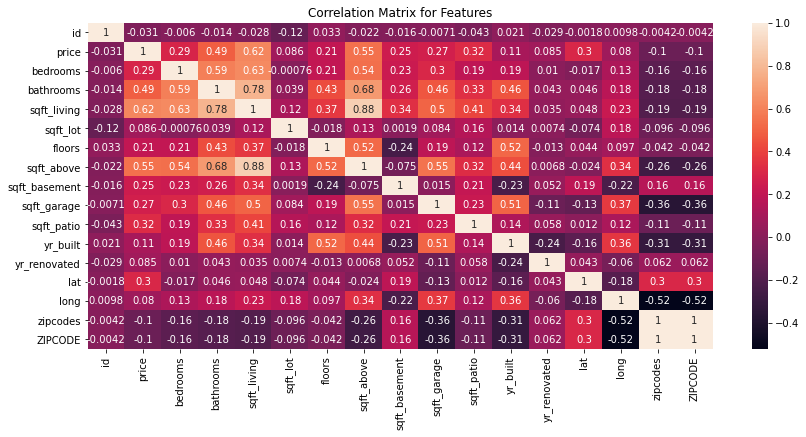

In [1174]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

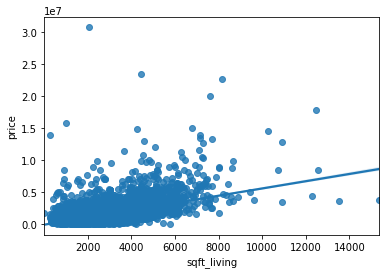

In [1175]:
sns.regplot(x =df['sqft_living'],y = df['price'])

In [1176]:
#sns.pairplot(df)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

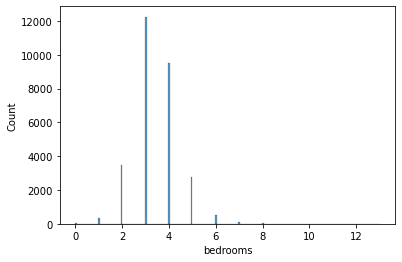

In [1177]:
sns.histplot(data = df['bedrooms'])

In [1178]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY'],
      dtype='object')

In [1179]:
df.groupby('PREFERRED_CITY')['price'].mean().sort_values(ascending=False)

PREFERRED_CITY
MEDINA           5.319170e+06
MERCER ISLAND    2.761960e+06
BELLEVUE         2.149155e+06
SAMMAMIISH       1.903189e+06
SAMMAMISH        1.707086e+06
KIRKLAND         1.640557e+06
PRESTON          1.600500e+06
REDMOND          1.563663e+06
WOODINVILLE      1.550504e+06
FALL CITY        1.539561e+06
ISSAQUAH         1.462132e+06
BOTHELL          1.202928e+06
SNOQUALMIE       1.173838e+06
KENMORE          1.083541e+06
NORTH BEND       1.062900e+06
SEATTLE          1.016644e+06
VASHON           9.884233e+05
CARNATION        9.740629e+05
DUVALL           9.723781e+05
RAVENSDALE       9.540643e+05
RENTON           8.823328e+05
BLACK DIAMOND    8.342228e+05
MAPLE VALLEY     8.072041e+05
ENUMCLAW         6.485286e+05
KENT             6.477059e+05
AUBURN           6.245891e+05
FEDERAL WAY      6.138539e+05
MILTON           5.741593e+05
GOLD BAR         5.153000e+05
PACIFIC          4.929118e+05
SKYKOMISH        4.572688e+05
BARING           2.546667e+05
Name: price, dtype: float

In [1180]:
(df['PREFERRED_CITY'] == 'PRESTON').value_counts()

False    29013
True         2
Name: PREFERRED_CITY, dtype: int64

In [1181]:
df['PREFERRED_CITY'].value_counts()

SEATTLE          11829
RENTON            2130
KENT              2083
AUBURN            1595
BELLEVUE          1575
KIRKLAND          1296
FEDERAL WAY       1135
REDMOND            961
MAPLE VALLEY       856
ISSAQUAH           703
WOODINVILLE        579
NORTH BEND         464
ENUMCLAW           457
SAMMAMISH          427
SAMMAMIISH         411
MERCER ISLAND      349
KENMORE            347
BLACK DIAMOND      313
SNOQUALMIE         292
BOTHELL            259
DUVALL             244
VASHON             191
CARNATION          156
FALL CITY          114
PACIFIC             77
RAVENSDALE          66
MEDINA              59
MILTON              23
SKYKOMISH           16
BARING               3
GOLD BAR             3
PRESTON              2
Name: PREFERRED_CITY, dtype: int64

In [1182]:
dfmedina = df[df['PREFERRED_CITY']=='MEDINA']

In [1183]:
dfmedina.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zipcodes,ZIPCODE
count,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.0
mean,4.228532e+09,5.319170e+06,3.813559,3.372881,3703.813559,17468.254237,1.567797,3048.050847,828.305085,486.694915,433.728814,1973.118644,338.152542,47.626201,-122.233462,98039.0,98039.0
std,2.002800e+09,3.536555e+06,1.279474,1.649434,2035.351647,9984.704716,0.495302,1633.786594,977.177767,338.000727,403.813282,26.993029,754.965923,0.009660,0.006101,0.0,0.0
min,2.210500e+09,1.550000e+06,1.000000,1.000000,410.000000,6534.000000,1.000000,410.000000,0.000000,0.000000,0.000000,1921.000000,0.000000,47.611735,-122.241537,98039.0,98039.0
25%,2.525049e+09,3.027500e+06,3.000000,2.000000,2125.000000,12093.500000,1.000000,1765.000000,0.000000,250.000000,160.000000,1952.500000,0.000000,47.618430,-122.238398,98039.0,98039.0
50%,3.625049e+09,4.200000e+06,4.000000,3.000000,3450.000000,16091.000000,2.000000,2680.000000,530.000000,500.000000,370.000000,1964.000000,0.000000,47.623160,-122.235470,98039.0,98039.0
75%,5.425700e+09,6.050000e+06,5.000000,4.500000,4755.000000,20071.000000,2.000000,4170.000000,1555.000000,755.000000,635.000000,1991.000000,0.000000,47.633310,-122.226633,98039.0,98039.0
max,9.313900e+09,2.000000e+07,6.000000,7.000000,10250.000000,77594.000000,2.000000,6890.000000,3530.000000,1200.000000,1950.000000,2021.000000,2007.000000,47.643985,-122.222763,98039.0,98039.0


In [1184]:
citylist = ['MILTON', 'SKYKOMISH', 'BARING', 'GOLD BAR', 'PRESTON']
df = df[~df['PREFERRED_CITY'].isin(citylist)]

In [1185]:
df = df[df['sqft_lot'] < 800000]

In [1186]:
df.shape

(28939, 29)

# Data Cleaning and Transformation

In [1187]:
df['ysb'] = 2023 - df['yr_built']

In [1188]:
df['ysr'] = 2023 - df['yr_built']

In [1189]:
df['RecentlyBuiltorRenovated'] = (df['ysb'] < 20) | (df['ysr'] < 10)

In [1190]:
df['trial'] = (df['bedrooms'] + df['bathrooms']) / (df['sqft_above'] + df['sqft_basement'])

In [1191]:

df['bedtobath'] = df['bedrooms'] * df['bathrooms']


In [1192]:
df['month_sold'] = df['date'].dt.month

In [1193]:
df['yr_built_or_renovated'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] != 0 else row['yr_built'], axis=1)

# Ordinal Encoding

In [1196]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [1197]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [1198]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [1199]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [1200]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [1201]:
df['greenbelt'].unique()

array(['NO', 'YES'], dtype=object)

In [1202]:
df['RecentlyBuiltorRenovated'].unique()

array([False,  True])

In [1203]:
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['nuisance'] = df['nuisance'].astype('category')
df['greenbelt'] = df['greenbelt'].astype('category')
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].astype('category')

In [1204]:
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average','Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
                                                  '6 Low Average', '7 Average', '8 Good', '9 Better',
                                                  '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df['waterfront'] = df['waterfront'].cat.reorder_categories(['NO', 'YES'])
df['nuisance'] = df['nuisance'].cat.reorder_categories(['NO', 'YES'])
df['greenbelt'] = df['greenbelt'].cat.reorder_categories(['NO', 'YES'])
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].cat.reorder_categories([False, True])

In [1205]:
print(df['grade'].cat.codes)
print(df['condition'].cat.codes)
print(df['view'].cat.codes)
print(df['waterfront'].cat.codes)
print(df['nuisance'].cat.codes)
print(df['greenbelt'].cat.codes)
print(df['RecentlyBuiltorRenovated'].cat.codes)

0        5
1        5
2        5
3        7
4        5
        ..
31777    6
31778    5
31779    5
31780    6
31781    5
Length: 28939, dtype: int8
0        3
1        2
2        2
3        2
4        2
        ..
31777    3
31778    2
31779    2
31780    2
31781    2
Length: 28939, dtype: int8
0        0
1        2
2        2
3        2
4        0
        ..
31777    0
31778    1
31779    0
31780    0
31781    0
Length: 28939, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28939, dtype: int8
0        0
1        1
2        0
3        0
4        1
        ..
31777    0
31778    0
31779    1
31780    0
31781    0
Length: 28939, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28939, dtype: int8
0        0
1        0
2        0
3        1
4        1
        ..
31777    0
31778    1
31779    0
31780    1
31

In [1206]:
ord_cat_selector = ['condition', 'grade', 'view', 'waterfront', 'nuisance', 'greenbelt', 'RecentlyBuiltorRenovated']
cat_subset = df[ord_cat_selector]
grade_ls = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
            '6 Low Average', '7 Average', '8 Good', '9 Better',
            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
cond_ls = ['Poor', 'Fair', 'Average','Good', 'Very Good']
view_ls = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
wf_ls = ['NO', 'YES']
nuisance_ls = ['NO', 'YES']
gb_ls = ['NO', 'YES']
RBoR = [False, True]
o_enc = OrdinalEncoder(categories = [cond_ls, grade_ls, view_ls, wf_ls, nuisance_ls, gb_ls, RBoR])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['NO', 'YES'], ['NO', 'YES'], ['NO', 'YES'],
                           [False, True]])

In [1207]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)

In [1208]:
o_enc.inverse_transform(X_subset)

array([['Good', '7 Average', 'NONE', ..., 'NO', 'NO', False],
       ['Average', '7 Average', 'AVERAGE', ..., 'YES', 'NO', False],
       ['Average', '7 Average', 'AVERAGE', ..., 'NO', 'NO', False],
       ...,
       ['Average', '7 Average', 'NONE', ..., 'YES', 'NO', False],
       ['Average', '8 Good', 'NONE', ..., 'NO', 'NO', True],
       ['Average', '7 Average', 'NONE', ..., 'NO', 'NO', False]],
      dtype=object)

In [1209]:
X_subset = X_subset.rename(columns = {'condition': 'house_cond','grade':'grade2', 
                                      'view':'view2', 'waterfront': 'wf2', 
                                      'nuisance':'nuisance2', 'greenbelt': 'greenbelt2', 'RecentlyBuiltorRenovated' : 'RBoR2'}) 

In [1210]:
df1 = pd.concat([df.reset_index(), X_subset], axis =1)

In [1211]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'ysb', 'ysr', 'RecentlyBuiltorRenovated',
       'trial', 'bedtobath', 'month_sold', 'yr_built_or_renovated',
       'house_cond', 'grade2', 'view2', 'wf2', 'nuisance2', 'greenbelt2',
       'RBoR2'],
      dtype='object')

# Test Train Split and LR Score

In [1212]:
# THIS IS MY BASE MODEL

X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.38046347367021316

In [1213]:
X = df[['sqft_living']]
y = df['price']

from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.38046347367021316

In [1214]:
lr = LinearRegression()
lr

LinearRegression()

In [1215]:
# removed id, price, ZIPCODE, address, lat, long
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2', 'greenbelt2', 'trial','RBoR2']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [1216]:
lr.fit(X_train, y_train)

LinearRegression()

In [1217]:
lr.score(X_train,y_train)

0.5086795579878578

In [1218]:
print(len(X_train))
print(len(X_test))

20257
8682


# Nominal Encoding

In [1219]:
numeric_cols= ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 
                'yr_built', 'yr_renovated', 'zipcodes', 'nuisance2', 'view2', 'wf2', 'greenbelt2', 
              ]
ss = preprocessing.StandardScaler()


ss.fit(X_train[numeric_cols])

X_stan_train = ss.transform(X_train[numeric_cols])
X_stan_test = ss.transform(X_test[numeric_cols])

X_dfstan_train = pd.DataFrame(X_stan_train, columns = numeric_cols)
X_dfstan_test = pd.DataFrame(X_stan_test, columns = numeric_cols)
                              

In [1220]:
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'coords', 'zipcodes',
       'ZIPCODE', 'PREFERRED_CITY', 'ysb', 'ysr', 'RecentlyBuiltorRenovated',
       'trial', 'bedtobath', 'month_sold', 'yr_built_or_renovated',
       'house_cond', 'grade2', 'view2', 'wf2', 'nuisance2', 'greenbelt2',
       'RBoR2'],
      dtype='object')

In [1279]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 
                'zipcodes', 'nuisance2', 'view2', 'wf2', 'greenbelt2', 'floors',
                'sewer_system',  'RBoR2',  'month_sold', 'yr_built']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [1280]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [1281]:
nominal_cols = ['sewer_system', 'zipcodes', 'month_sold', 'yr_built']

In [1282]:
ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [1283]:
X_train_ohe =pd.concat([X_train.drop(columns = nominal_cols).reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_test.drop(columns = nominal_cols).reset_index(),
                        ohe_test],1)

In [1284]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)
# lr.score(X_train_ohe, y_train)

0.6124716553472309

In [1285]:
lr.coef_

array([-1.86994320e-01,  5.17259658e+04,  1.20482433e+05,  2.20571103e+02,
        1.89260601e+02,  2.18295332e+01, -6.29482907e+04,  5.58800820e+04,
       -4.44518517e+04,  1.04780225e+05,  9.56432302e+05,  2.18679523e+04,
       -1.38273248e+05, -1.70254684e+04,  2.74075757e+04, -6.51839598e+04,
        3.26705592e+04,  5.10582499e+03, -4.53199482e+05, -3.84544753e+05,
       -4.06506994e+05,  1.82965231e+06,  6.34878111e+05,  3.16105408e+05,
        2.79353829e+05,  3.31750212e+05, -5.50356261e+05, -3.31689059e+04,
       -3.29090598e+05, -2.28499023e+05, -4.79746465e+05, -5.09036196e+05,
       -7.27717035e+04,  1.38361307e+04, -9.72519771e+04,  2.00970310e+05,
       -4.37955529e+05, -3.90969590e+05, -3.96979162e+05,  6.70176847e+05,
        1.59504736e+05, -3.94298546e+05,  3.45358474e+06,  8.96347897e+05,
       -4.53877856e+05, -2.84775372e+05, -3.00471292e+05, -3.68478621e+05,
        3.20985159e+05,  1.20000219e+05, -3.36019715e+05, -1.12850970e+05,
       -3.52674158e+05, -

In [1286]:
import statsmodels.api as sm

# add a constant (intercept term) to the predictors
X_train_ohe = sm.add_constant(X_train_ohe)
X_test_ohe = sm.add_constant(X_test_ohe)

# reset the index of y_train
y_train_reset = y_train.reset_index(drop=True)

model = sm.OLS(y_train_reset, X_train_ohe)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     205.8
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:04:50   Log-Likelihood:            -2.9403e+05
No. Observations:               20257   AIC:                         5.885e+05
Df Residuals:                   20035   BIC:                         5.903e+05
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.513e+

In [ ]:
df['green']

In [ ]:
has basement vs doesnt have basement